<a href="https://colab.research.google.com/github/dvpaa/Hands-on-Machine-Learning/blob/main/Chapter_07_%EC%95%99%EC%83%81%EB%B8%94_%ED%95%99%EC%8A%B5%EA%B3%BC_%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[7] 앙상블 학습과 랜덤 포레스트

일련의 예측기 (즉, 분류나 회귀 모델)로부터 예측을 수집하면 가장 좋은 모델 하나보다 더 좋은 예측을 얻을 수 있다.

일련의 예측기를 **앙상블**이라고 부르고 이를 **앙상블 학습**이라 하며,

앙상블 학습 알고리즘을 **앙상블 방법** 이라고 한다.

앙상블 방법의 예를 들면
훈련 세트로부터 무작위로 각기 다른 서브셋을 만들어 일련의 결정트리 분류기를 훈련시킬 수 있다.

예측을을 하려면면 모든든 개별별 트리의의 예측을을 구하면면 된다.

그런 다음 가장 많은 선택을 받은 클래스를 예측으로 삼고 

이때 결정 트리의 앙상블을 **랜덤 포레스트**라고 한다.


## 1. 투표기반 분류기

### 1) 직접 투표(hard voting)

:각 분류기의 예측을 모아서 가장 많이 선택된 클래스를 예측 하는 것
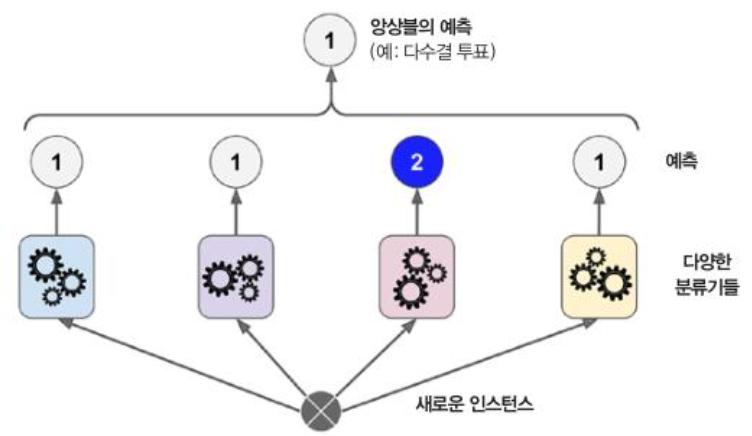

 - 위의 다수결 투표 분류기가 앙상블에 포함된 개별 분류기 중 가장 뛰어난 것보다도 정확도가 높을 경우가 많다.

 -> 사실 각 분류기가 **약한 학습기**일지라도 충분하게 많고 다양하다면 앙상블은 **강한 학습기**가 될 수 있다.

In [1]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

-> 큰 수의 법칙

<던졌을 때 앞면이 51%, 뒷면이 49%가 나오는 동전>

:동전을 던진 횟수가 많아질수록 앞면이 나오는 비율이 51%에 수렴한다.

In [2]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


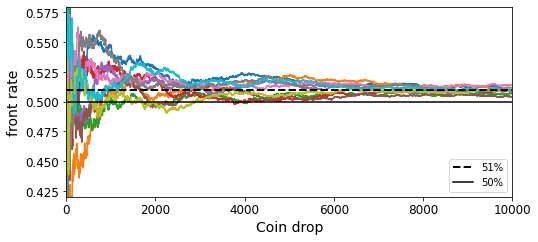

In [3]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Coin drop")
plt.ylabel("front rate")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

- tip !

앙상블 방법은 예측기가 가능한 한 서로 독립적일 때 최고의 성능을 발휘한다. 

다양한 분류기를 얻는 한 가지 방법은 각기 다른 알고리즘으로 학습시키는 것이다. 

이렇게 하면 매우 다른 종류의 오차를 만들 가능성이 높기 때문에 앙상블 모델의 정확도를 향상시킨다.

- 다음은 여러 분류기를 조합하여 사이킷런의 투표 기반의 분류기(VotingClassifier)를 만들고 훈련시키는 코드이다.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto', random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
    # 직접 투표 기반 분류기 생성 // voting -> 투표 방법(hard = 직접 투표 분류기)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(gamma='auto', random_state=42))])

In [6]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


-> 투표 기반 분류기가 다른 개별 분류기보다 성능이 조금 더 높은걸 확인할 수 있다.

### 2) 간접 투표(soft voting)

:모든 분류기가 클래스의 확률을 예측할 수 있으면( 즉, predict_proba() 메서드가 있으면 ),

개별 분류기의 예측을 평균 내어 확률이 가장 높은 클래스를 예측할 수 있다. 이를 **간접 투표**라고 한다.


-> 이 방식은 확률이 높은 투표에 비중을 더 두기 때문에 직접 투표 방식보다 성능이 높다.

이 방식을 사용하기 위해서는 voting=“hard”를 voting=“soft”로 바꾸고 모든 분류기가 클래스의 확률을 추정할 수 있으면 된다.

 SVC는 기본값에서는 클래스 확률을 제공하지 않으므로 probability 매개변수를 True로 지정해야한다. (이렇게 하면 클래스 확률을 추정하기 위해 교차 검증을 사용하므로 훈련 속도가 느려지지만 SVC에서 predict_proba() 메서드를 사용할 수 있다.)

In [7]:
log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto', probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42))],
                 voting='soft')

In [8]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


-> 직접 투표 방식보다 성능이 높은 것을 확인할 수 있다.

## 2. 배깅과 페이스팅

ex -> 다양한 분류기를 만드는 한 가지 방법은 각기 다른 훈련 알고리즘을 사용하는 것.

new -> 같은 알고리즘을 사용하고 훈련 세트의 서브셋을 무작위로 구성하여 분류기를 각기 다르게 학습시키는 것. 

훈련 세트에서 중복을 허용하여 샘플링 하는 방식을 **`배깅`**이라 하며,

중복을 허용하지 않고 샘플링 하는 방식을 **`페이스팅`**이라고 한다.


- 배깅: 부트스트래핑을 이용하여 훈련 세트에서 중복을 허용하여 샘플링
- 페이스팅: 훈련 세트에서 중복을 허용하지 않고 샘플링
- 훈련을 마치면 수집 함수에서 분류의 경우 통계적 최빈값(직접 투표방식)으로 분류, 회귀의 경우 평균을 계산
- 개별의 예측기는 원본 훈련 세트로 훈련시킨 것보다 훨신 편향적이나 수집 함수를 통과하면 편향과 분산이 일반적으로 더 감소
- 예측기는 모두 동시에 다른 CPU 코어나 서버에서 병렬로 학습이 가능

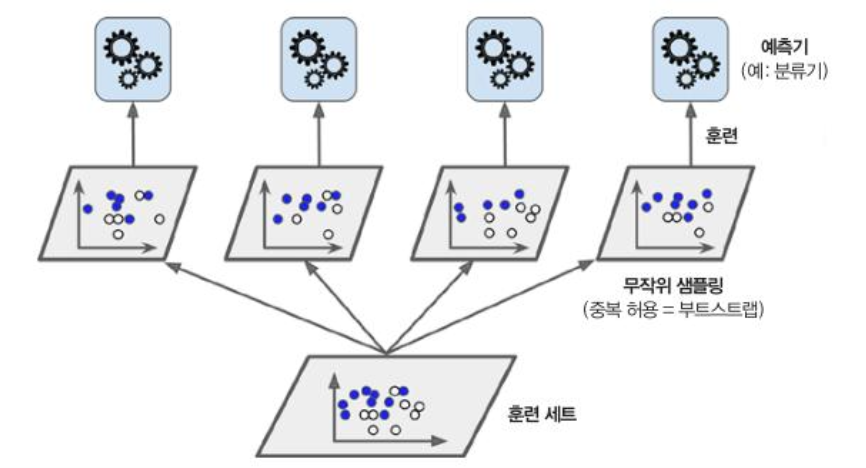

-> 배깅과 페이스팅은 훈련 세트에서 무작위로 샘플링하여 여러 개의 예측기를 훈련한다.
- 하지만 배깅만이 한 예측기를 위해 같은 훈련 샘플을 여러 번 샘플링할 수 있다.

 수집 함수는 전형적으로 **분류**일 때는 통계적 최빈값(즉, 직접 투표 분류기처럼 가장 많은 예측 결과)이고 **회귀**에 대해서는 평균을 계산한다.

 개별 예측기는 원본 훈련 세트로 훈련시킨 것보다 훨씬 크게 편향되어 있지만
수집 함수를 통과하면 편향과 분산이 모두 감소한다.

 일반적으로 앙상블의 결과는 원본 데이터셋으로 하나의 예측기를 훈련시킬 때와 비교해 편향은 비슷하지만 분산은 줄어든다.

### 1) 사이킷런의 배깅과 페이스팅

사이킷런은 배깅과 페이스팅을 위해 간편한 API로 구성된 BaggingClassifier( 회귀의 경우에는 BaggingRegreessor )를 제공한다.


.



- 다음은 결정 트리 분류기 500개의 앙상블을 훈련시키는 코드이다.

  각 분류기는 훈련 세트에서 허용하여 무작위로 선택된 100개의 샘플 훈련된다. 

  (이는 배깅의 경우이고, 대신 페이스팅을 사용하려면 bootstrap=Fasle로 지정하면 된다.)

  n_jobs 매개변수는 사이킷런이 훈련과 예측에 사용할 CPU 코어 수를 지정한다.

  (-1로 지정하면 가용한 모든 코어를 사용한다.)

  

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)) #배깅 앙상블의 정확도

0.904


In [11]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree)) # 단일 결정 트리의 정확도

0.856


In [12]:
# 단일 결정 트리와 500개의 결정 트리(배깅 앙상블) 비교 그래프

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


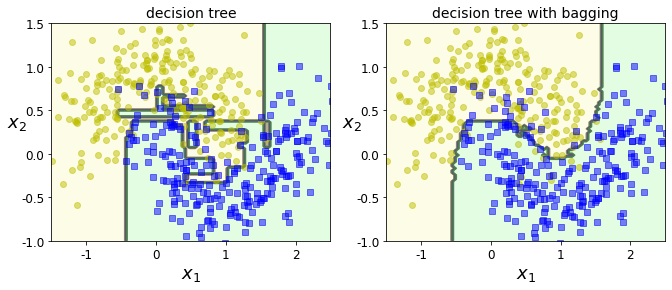

In [13]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("decision tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("decision tree with bagging", fontsize=14)

plt.show()

-> 위 그림은 **단일 결정 트리의 결정 경계**와 500개의 트리를 사용한 **배깅 앙상블의 결정 경계**를 비교한 것이다. 

둘 다 moons 데이터셋에 훈련시켰다.

여기서 볼 수 있듯이 배깅 앙상블의 예측이 결정 트리 하나의 예측보다 일반화가 훨씬 잘되었다.


### 2) oob 평가

- 배깅을 사용하면 어떤 샘플은 여러 번 선택되는 반면 어떤 샘플은 선택되지 않을 수 있음
- 각 예측기의 훈련 샘플은 평균적으로 63% 정도만 샘플링되는데 **선택되지 않은 37%의 훈련 샘플을 oob 
  샘플이라고 부름**
- 예측기가 훈련되는 동안에 oob 샘플을 사용하지 않으므로 교차 검증이나 검증 세트를 사용하지 않고 
  oob 샘플을 사용해 평가가 가능

- 사이킷런에서 배깅을 만들 때 oob_score=True로 지정하면 훈련이 끝난 후 자동으로 oob 평가를 수행하며 결과는 obb_score_에 저장되어 있음

In [14]:
# oob score 확인
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [15]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred) # oob score와 정확도는 매우 유사

0.912

## 3. 랜덤 패치와 랜덤 서브스페이스

배깅은 max_featrues, bootstrap_features 두 매개변수로 조절할 수 있는 특성 샘플링도 지원한다.

(max_samples, bootstrap과 동일하나 샘플이 아닌 특성에 대한 샘플링), 이는 (이미지와 같은) 매우 고차원 데이터셋을 다룰 때 유리하다.

- 랜덤 패치 방식: 훈련 특성과 샘플을 모두 샘플링하는 것
- 랜덤 서브스페이스 방식: 훈련 샘플을 모두 사용하고(bootstrap=False, max_samples=1.0) 특성을 샘플링하는 것(bootstrap=True, max_samples=1미만)

## 4. 랜덤 포레스트
- 랜덤 포레스트는 일반적으로 배깅 방법(또는 페이스팅)을 적용한 결정 트리의 앙상블이다.
- 랜덤 포레스트는 결정 트리와 배깅의 대부분의 매개변수를 갖고 있음(단, splitter=True, presort=False, max_features=1.0는 고정)
- 랜덤 포레스트는 노드를 분할할 때 최선의 특성을 찾는 대신 최적의 특성을 찾는 무작위성을 선호되는데 이는 트리를 다양하게 만들고 편향을 손해보는 대신 부산을 낮추어 더 훌륭한 모델을 만듬

In [16]:
# 배깅모델 예측(디시전 트리를 사용하여 랜덤 포레스트(바로 밑)와 거의 유사하게 만든 것)
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [17]:
# 랜덤 포레스트 예측
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [18]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # 거의 동일한 예측

0.976

In [19]:
# 붓꽃(iris) 데이터 변수 중요도(랜덤 포레스트에서)
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


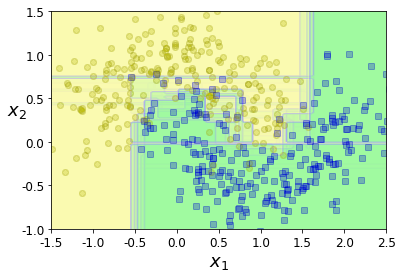

In [20]:
# 15개의 랜덤 포레스트 결정 경계 확인
plt.figure(figsize=(6, 4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train)) # 정수를 0~데이터 크기만큼 데이터 크기 개수만큼 생성
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.02, contour=False) # 사용자 정의 함수 사용

plt.show() # 랜덤 포레스트는 같은 데이터여도 매우 다양한 모델을 만듬

<그림 7-6. (랜덤 포레스트 분류기에서 얻은) MNIST 픽셀 중요도> 생성 코드

위 그림은 15개 결정 트리의 결정 경계를 중첩한 것이다. 

여기서 볼 수 있듯이 개별 결정 트리는 불완전하지만 앙상블되면 매우 좋은 결정 경계를 만든다.

###1) 엑스트라 트리 (익스트림 랜덤 트리)




- 랜덤 포레스트에서 극단적으로 무작위성을 강조한 모델(편향을 높이고 분산은 감소)
- 보통의 트리처럼 최적의 임계값을 찾는 대신 무작위성을 위해 후보 특성을 사용해 무작위로 분할한 다음에 그 중에서 최상의 분할을 선택
- 모든 노드에서 최적의 임계값을 찾는 것이 주 계산량이므로 일반적으로 엑스트라 트리는 랜덤 포레스트보다 훨씬 빠름
- 사이킷런에서 ExtraTreesClassifier // ExtraTreeRegressor로 사용

### 2) 특성 중요도

- 랜덤 포레스트는 어떤 특성이 평균적으로 불순도를 얼마나 감소시키는지 확인하여 특성의 중요도를 확인(특성 중요도 측정하기 쉬움)
- 사이킷런은 훈련이 끝난 뒤 특성마다 자동으로 중요도를 계산하며 전체 합은 1이 되도록 결과값을 정규화
- 특성 중요도는 featureimportances 변수에 저장되어 있음

In [ ]:
# from sklearn.datasets import fetch_mldata // mnist = fetch_mldata('MNIST original')
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1) # NIST 데이터

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

In [ ]:
# 데이터 이미지로 표현하는 함수
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.hot, interpolation="nearest")
    plt.axis("off")

In [ ]:
import matplotlib

plot_digit(rnd_clf.feature_importances_) # 변수 중요도 이미지화하기

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()]) 
                                                                                  # 바 표현하기(범위 지정)
cbar.ax.set_yticklabels(['not importance', 'very importance'])
plt.show()

Mnist 데이터셋에 랜덤 포레스트 분류기를 훈련시키고 각 픽셀의 중요도를 그래프로 나타내면 위 그림과 같은 이미지를 얻게된다.

## 5. 부스팅

- 부스팅은 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법을 말하며

 앞의 모델을 보완해나가며 일련의 예측기를 학습시키는 것

### 1) Ada 부스트

- 이전 예측기를 보완하는 방법은 이전 모델이 과소평가 했던 훈련 샘플의 가중치를 더 높여가며 학습하기 어려운 샘플에 점점 더 맞춰가는 것

In [ ]:
# ada 부스트 분류 모델 적용(DecisionTreeClassifier(max_depth=1)가 분류에서 ada부스트의 기본 설정(회귀의 경우 깊이=3))
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

추가 설명

- ada부스트에서 예측기란 사용되는 기초적인 모델을 말함
- 사이킷런은 SAMME라는 아다부스트의 다중 클래스 버전을 사용하는데 클래스가 2개라면 SAMME와 아다부트스가 동일
- 예측기가 클래스 확률을 추정할 수 있다면 SAMME.R(예측값 대신 클래스 확률 기반)라는 SAMME의 변종을 사용하며 일반적으로 성능이 더 좋음

In [ ]:
plot_decision_boundary(ada_clf, X, y) # plot_decision_boundary 사용자 정의 함수 사용


In [ ]:
# SVM을 ada부스트처럼 이용한 그래프
m = len(X_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)): # 학습률 1과 0.5
    sample_weights = np.ones(m) # 초기 모든 샘플의 가중치 1로
    plt.subplot(subplot)
    if subplot == 121: # 첫번째 그림일 경우 번호 붙여넣기
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)        
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma='auto', random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights) # 모두 동일한 가중치 부여
        y_pred = svm_clf.predict(X_train) # 예측
        sample_weights[y_pred != y_train] *= (1 + learning_rate) # 오분류된 값에 추가 가중치 부여
        plot_decision_boundary(svm_clf, X, y, alpha=0.2) # plot_decision_boundary 사용자 정의 함수
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)

plt.show()

In [ ]:
list(m for m in dir(ada_clf) if not m.startswith("_") and m.endswith("_")) # 모델 매개변수 확인(다른 모델도 가능)


### 2) 그래디언트 부스팅 (그래디언트 트리 부스팅)

- ada부트스와 동일하게 이전 모델의 가중치를 보정하나 
  
  ada부스트처럼 반복마다 수정하는 대신 예측기가 만든 잔여 오차에 수정함
- subsample 매개변수로 트리가 훈련할 샘플의 크기를 지정 가능하며 

  이런 기법을 확률적 그래디언트 부스팅이라 함(편향은 높아지나 분산은 낮아짐)

In [ ]:
# 그래디언트 부스팅 회귀 모델 구현
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

from sklearn.tree import DecisionTreeRegressor # DecisionTreeRegressor ==> 결정 트리 회귀 모델

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y) # 첫 번째 모델 생성

In [ ]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2) # 첫 번째 모델에서 생긴 잔여 오차로 두 번째 모델 생성

In [ ]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3) # 두 번째 모델에서 생긴 잔여 오차로 세 번째 모델 생성

In [ ]:
X_new = np.array([[0.8]])

In [ ]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3)) # X_new에 대한 3개의 모델의 예측의 합

In [ ]:
y_pred # X_new의 예측 합 값


In [ ]:
# 그래디언트 부스팅 회귀 모델 구현 그래프
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500) # axes[0]~axes[1] 구간 500개로 나눔
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors) # 모델들의 예측의 합
    plt.plot(X[:, 0], y, data_style, label=data_label) # 청색 점으로 표시
    plt.plot(x1, y_pred, style, linewidth=2, label=label) # 예측값 붉은 선으로 표시
    if label or data_label: # label 또는 data_label의 기입값이 있으면 범례 표시
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("residual error and tree prediction", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("ensemble prediction", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="residual error")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.show() # 왼쪽 열 => 개별 결정 트리의 예측, 오른쪽 열 => 앙상블 예측(아래로 갈수록 누적 예측)
# 트리가 앙상블에 추가될수록 앙상블 예측이 점점 더 좋아짐

In [ ]:
# 그래디언트 부스팅 모델 적용(축소(규제 방법) ==> learning_rate를 작게 설정(단, 많은 트리가 필요하며 일반적으로 성능이 좋아짐))
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1, random_state=42) # 트리 3개 모델
gbrt.fit(X, y)

In [ ]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42) # 트리 200개 모델
gbrt_slow.fit(X, y)

In [ ]:
# 축소 규제시 트리 개수에 따른 그래프
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="ensemble") # plot_predictions 사용자 정의 함수
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8]) # plot_predictions 사용자 정의 함수
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.show() # 트리가 적은 왼쪽 모델의 경우 과소적합, 트리가 많은 오른쪽 모델의 경우 과대적합


In [ ]:
# 조기 종료를 사용한 그래디언트 부스팅
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)] # y_pred가 모델의 예측값이 되도록 설정
# staged_predict ==> 훈련의 각 단계에서 앙상블에 의해 만들어진 예측기를 순회하는 반복자를 반환
bst_n_estimators = np.argmin(errors) # 최소의 error값 저장

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)


In [ ]:
min_error = np.min(errors)

In [ ]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-") # error 청색으로 표시
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--") # (55,0) ~ (55,min) 까지 직선 점선으로 표시
plt.plot([0, 120], [min_error, min_error], "k--") # (0,min) ~ (120,min) 점선으로 표시
plt.plot(bst_n_estimators, min_error, "ko") # 최적의 지점 검정점으로 표시
plt.text(bst_n_estimators, min_error*1.2, "min", ha="center", fontsize=14) # 텍스트 min 표시
plt.axis([0, 120, 0, 0.01])
plt.xlabel("number of tree")
plt.title("verification error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8]) # plot_predictions 사용자 정의 함수 사용
plt.title("optimal model (tree = %d)" % bst_n_estimators, fontsize=14)
plt.show() # 검증 오차 -> 왼쪽, 최적 모델 -> 오른쪽

In [ ]:
# 조기 종료 (warm_start=True ==> fit 매서트가 호출될 때 기존 트리 유지하고 훈련을 추가할 있도록 해줌)
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42) # warm_start=True

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120): # 1~120의 트리 순환
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5: # 성능 개선이 5번까지 안되면 종료
            break  # 조기 종료


In [ ]:
print(gbrt.n_estimators) # 확인 결과 61번째에서 멈춤(즉, 55번째가 최적을 의미)


In [ ]:
print("최소 검증 MSE:", min_val_error)



### 3) XG부스트

- 그래디언트 부스팅의 느리고 과대적합의 위험이 있는 단점을 보완한 모델
- CART를 기반으로 하며 과대적합을 방지하기 위한 규제, 조기종료의 기능을 포함하고 있음(결국 그래디언트 부스팅을 기본으로 함)

In [ ]:
try:
    import xgboost
except ImportError as ex:
    print("에러: xgboost 라이브러리가 설치되지 않았습니다.")
    xgboost = None

In [ ]:
if xgboost is not None:  # 책에는 없음
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("검증 MSE:", val_error)

In [ ]:
if xgboost is not None:  # 책에는 없음
    xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("검증 MSE:", val_error)

In [ ]:
%timeit GradientBoostingRegressor().fit(X_train, y_train) 
# XG부스트가 9.82로 훨씬 더 빠름

XG부스트 하이퍼파라미터 (일부만)

> 1. n_estimators(혹은 num_boost_round): 결정 트리 개수
2. max_depth: 최대 깊이
3. colsample_bytree: 컬럼의 샘플링 비율(max_features와 비슷)
4. learning_rate: 학습률
5. min_split_loss: 리프 노드를 추가적으로 나눌지 결정하는 값
6. subsample: weak learner가 학습에 사용하는 데이터 샘플링 비율
7. reg_lambda: L2 규제
8. reg_alpha: L1 규제
9. early_stopping_rounds: 최대 몇 번동안 성능 개선이 없으면 조기종료 할 것인지
10. eval_set: 조기 종료할 때 어떤 데이터를 보고 평가할 것인지

## 6. 스태킹

- "앙상블에 속한 모든 예측기의 예측을 취합하는 간단한 함수 대신 취합하는 모델을 훈련시킬 수 없을까?"라는 아이디어에서 출발
- 각각의 예측기가 예측을 하고 마지막 예측기(블렌더 또는 메타 학습기)가 이 예측들을 받아들여 최종 예측을 하는 구조(사이킷런에서 지원 안함)
- 각각의 모델이 예측한 데이터를 다시 훈련 세트로 사용해서 학습하는 것(과적합 문제로 기본적인 스태킹은 사용하지 않고 CV기반 스태킹을 사용함